In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load stars datasets

In [2]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
print(csv_delta_scuti)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850
4   CID100866999        56   3.

In [3]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",")
csv_bedding

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


,HD,Name,TIC,V,Teff,L,e.L.,rho,e.rho.,Dnu,...,e.vsini.,F0,logg,Teff_mast,e_logg,e_Teff_mast,stellar_radius,e_stellar_radius,ID,dnu_muhz
0,2280.0,NaN,281499618,9.13,7510.0,5.52,0.26,0.49,0.06,7.17,...,1.3,19.5741,4.39426,7575.00,0.079169,138.757,1.39528,0.042407,TESS2018234235059-S0002-0000000281499618-0121-...,82.986111
1,3622.0,NaN,43363194,7.77,7930.0,7.86,0.35,0.45,0.06,6.89,...,6.0,17.9829,4.33815,7779.00,0.080995,127.816,1.52225,0.043553,TESS2018263035959-S0003-0000000043363194-0123-...,79.745370
2,10779.0,NaN,229139161,8.78,7730.0,8.13,0.36,0.39,0.05,6.80,...,5.0,17.8840,4.31312,7862.00,0.079127,143.816,1.57905,0.044208,TESS2018234235059-S0002-0000000229139161-0121-...,78.703704
3,10961.0,NaN,231014033,9.39,7430.0,NaN,NaN,NaN,NaN,7.30,...,3.0,19.7100,4.30846,7600.00,0.080017,137.430,1.54452,0.052922,TESS2018263035959-S0003-0000000231014033-0123-...,84.490741
4,17341.0,NaN,122615966,9.32,7810.0,10.05,0.50,0.32,0.05,5.90,...,1.0,16.1070,4.24043,7850.00,0.078290,131.083,1.71688,0.046400,TESS2018263035959-S0003-0000000122615966-0123-...,68.287037
5,17693.0,NaN,122686610,7.80,7880.0,10.21,0.44,0.33,0.04,6.41,...,NaN,16.7301,4.24711,7940.00,0.074653,132.040,1.72004,0.047045,TESS2018263035959-S0003-0000000122686610-0123-...,74.189815
6,20203.0,NaN,274038922,8.85,7970.0,8.06,0.38,0.45,0.05,7.20,...,25.0,19.8720,4.39860,8144.00,0.073741,167.493,1.47477,0.046296,TESS2018292075959-S0004-0000000274038922-0124-...,83.333333
7,20232.0,NaN,159895674,6.88,8060.0,8.64,0.36,0.44,0.05,6.86,...,3.0,18.1104,4.33075,7963.00,0.072418,128.366,1.56787,0.043286,TESS2018263035959-S0003-0000000159895674-0123-...,79.398148
8,24572.0,NaN,242944780,9.45,7410.0,7.25,0.36,0.35,0.05,7.20,...,NaN,18.5760,4.32415,7928.00,0.087546,473.676,1.57199,0.052960,TESS2018319095959-S0005-0000000242944780-0125-...,83.333333
9,24975.0,NaN,44645679,7.24,7790.0,9.20,0.39,0.35,0.04,6.23,...,4.0,16.0734,4.23611,7693.00,0.077129,119.353,1.69752,0.047540,TESS2018319095959-S0005-0000000044645679-0125-...,72.106481


### Load pretrainned NN model

In [4]:
sepconv_mod = tf.keras.models.load_model(
    "/home/roberto/Projects/best_train/sepconvnn_tmp_dos_200/"
)
sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 351, 10)           1010      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 342, 10)           1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 10)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 680)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               68100     
Total params: 70,160
Trainable params: 70,140
Non-trainable params: 20
___________________________________________________

## Results for 11 Binary DS Stars

In [5]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=False,
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


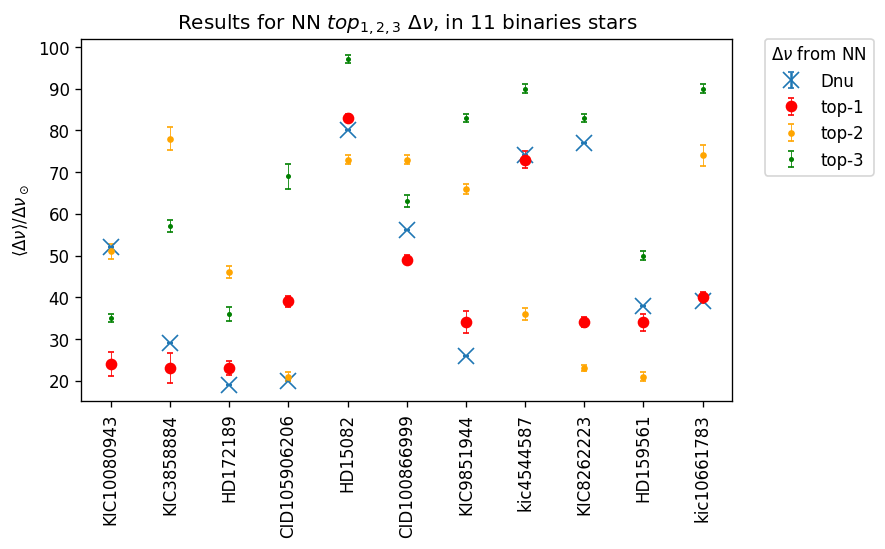

In [6]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

## Multiples of top1/top2 when top2 is requiered

In [7]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_delta_scuti["dnu-target"])
            - np.asarray(df_results_delta_scuti["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_delta_scuti["dnu-target"])
            - np.asarray(df_results_delta_scuti["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 0,
    df_results_delta_scuti["top1"],
    df_results_delta_scuti["top2"],
)
# Show multiples
df_results_delta_scuti.loc[select_closest_top == 1, ["id", "top1", "top2"]]

,id,top1,top2
0,KIC10080943,24,51
3,CID105906206,39,21


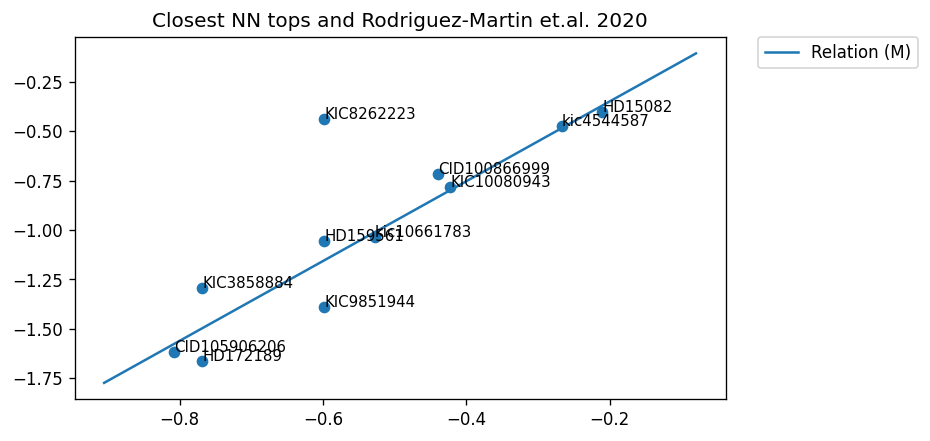

In [8]:
inferences.plot_relation_rodriguez(df_results_delta_scuti)

## Results for 57 Bedding stars


In [9]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=False,
)
df_results_bedding

,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,rho-target,e-rho-target,rho-top1,e-rho-top1,rho-top2,e-rho-top2,rho-top3,e-rho-top3,rho-top4,e-rho-top4
0,tess2018349182459-s0006-0000000034737955-0126-...,69,68,1.958508,21,3.420865,36,2.981769,50,1.271554,...,0.413639,0.129821,0.401619,0.126072,0.0374136,0.012076,0.111142,0.035312,0.215807,0.068077
1,tess2018319095959-s0005-0000000431695696-0125-...,84,40,1.282563,89,1.071572,55,1.946042,76,1.169338,...,0.615447,0.192742,0.137502,0.043577,0.691694,0.216514,0.261625,0.082390,0.502794,0.157621
2,tess2018263035959-s0003-0000000150272131-0123-...,83,40,1.021932,79,1.254240,65,2.107169,54,1.198524,...,0.600737,0.188156,0.137502,0.043577,0.543692,0.170372,0.366633,0.115160,0.252105,0.079417
3,tess2018319095959-s0005-0000000459942890-0125-...,82,38,2.072949,79,1.179070,58,1.808663,22,1.080464,...,0.586206,0.183626,0.123968,0.039335,0.543692,0.170372,0.291253,0.091640,0.0410998,0.013245
4,tess2019032160000-s0008-0000000332516661-0136-...,68,30,1.599047,67,1.567963,54,1.290611,43,2.647982,...,0.401619,0.126072,0.0769009,0.024550,0.389778,0.122379,0.252105,0.079417,0.15913,0.050351
5,tess2018349182459-s0006-0000000037498433-0126-...,82,30,2.756633,42,2.012310,74,1.033727,91,1.025502,...,0.586206,0.183626,0.0769009,0.024550,0.151743,0.048039,0.476425,0.149399,0.723452,0.226416
6,tess2018319095959-s0005-0000000246902545-0125-...,70,33,2.295792,67,1.098773,23,1.237877,50,1.224539,...,0.425838,0.133625,0.0932276,0.029686,0.389778,0.122379,0.0449611,0.014468,0.215807,0.068077
7,tess2018319095959-s0005-0000000306773428-0125-...,81,36,2.120982,70,1.526464,20,1.186996,55,1.374543,...,0.571855,0.179152,0.111142,0.035312,0.425838,0.133625,0.0339021,0.010961,0.261625,0.082390
8,tess2018349182459-s0006-0000000408906554-0126-...,82,77,1.019907,36,3.823671,50,1.578509,26,1.966609,...,0.586206,0.183626,0.516247,0.161815,0.111142,0.035312,0.215807,0.068077,0.057596,0.018463
9,tess2018234235059-s0002-0000000316806320-0121-...,65,27,1.859967,56,1.104312,89,1.047772,43,1.437113,...,0.366633,0.115160,0.0621586,0.019904,0.271323,0.085418,0.691694,0.216514,0.15913,0.050351


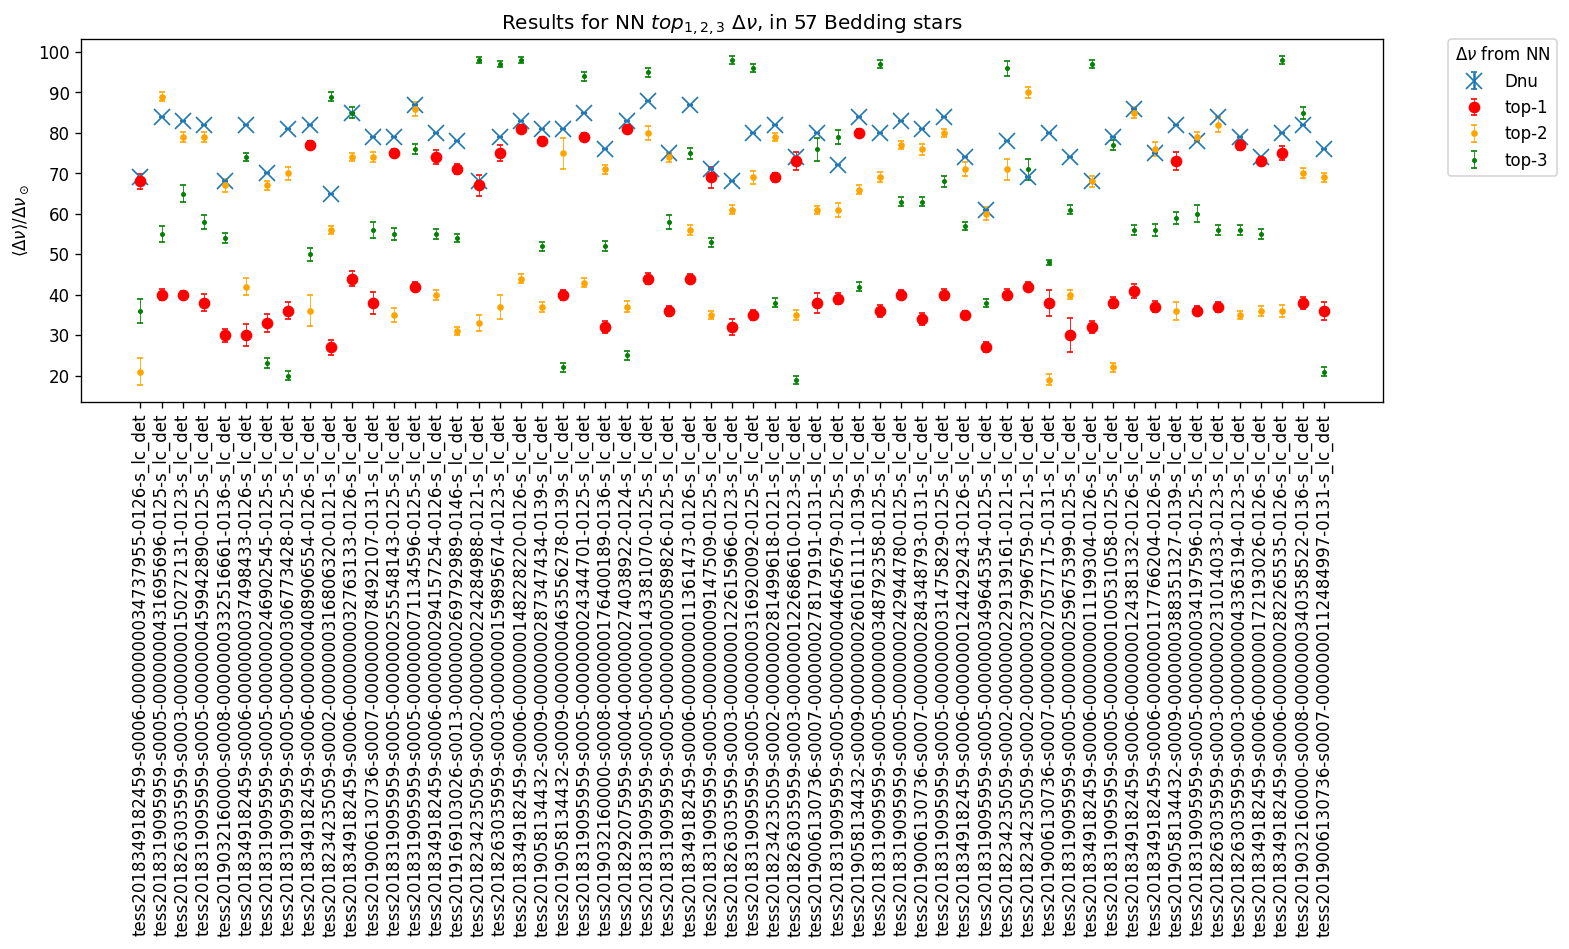

In [10]:
inf.plot_inferences(
    df_results_bedding,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

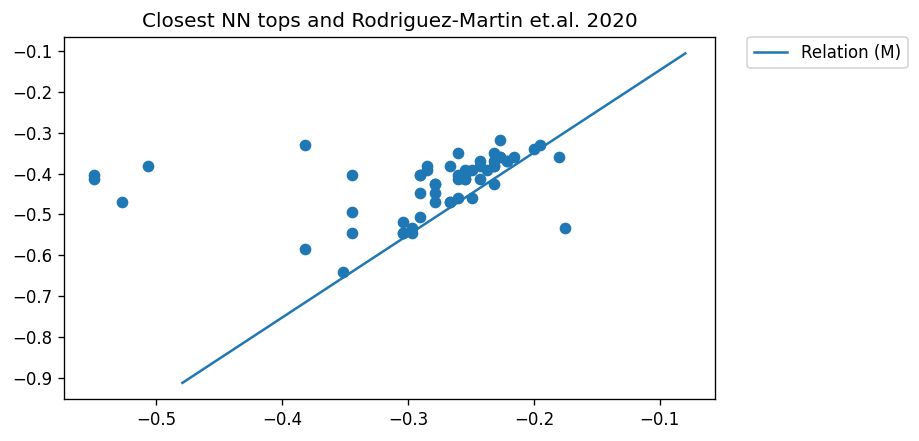

In [13]:
inferences.plot_relation_rodriguez(
    df_results_bedding, labels=False, relation_line_range=(5.2, 9)
)

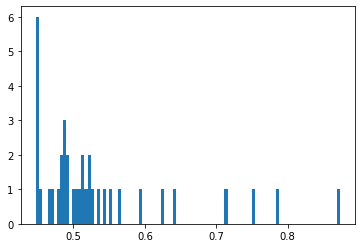

In [12]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 1, df_results_bedding["top1"], df_results_bedding["top2"]
)

plt.hist(
    df_results_bedding.loc[select_closest_top == 1, ["top1"]].values
    / df_results_bedding.loc[select_closest_top == 1, ["top2"]].values,
    bins=100,
)
plt.show()